In [1]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
import keras

import integrated_gradients as ig
import my_utils
from metaplot import Metaplot, one_hot_encode

def plot_meta(data, model, subset=None):

    if subset is None:
        print(len(data))
        data_seq = one_hot_encode(data, seq_len=50)
        data_ig = ig.integrated_gradients(model, data_seq)
        Metaplot(data_ig, colorbar = True)
    
    elif subset == 'lowest_ten':
        data_lowest_ten = data[data['pred'] <= data['pred'].quantile(0.1)]
        print(len(data_lowest_ten))
        lowest_ten_seq = one_hot_encode(data_lowest_ten, seq_len=50)
        lowest_ten_ig = ig.integrated_gradients(model, lowest_ten_seq)
        Metaplot(lowest_ten_ig, colorbar = True)

    elif subset == 'highest_ten':
        data_highest_ten = data[data['pred'] >= data['pred'].quantile(0.9)]
        print(len(data_highest_ten))
        highest_ten_seq = one_hot_encode(data_highest_ten, seq_len=50)
        highest_ten_ig = ig.integrated_gradients(model, highest_ten_seq)
        Metaplot(highest_ten_ig, colorbar = True)
        
    else:
        raise ValueError()

In [2]:
#import data
test_random = pd.read_csv('/Users/frederickkorbel/Documents/projects/paper/data/MRL_pred.csv')
test_human = pd.read_csv('/Users/frederickkorbel/Documents/projects/paper/data/hMRL_human_50_test_pred.csv')


#import models
mrl_model = keras.models.load_model('/Users/frederickkorbel/Documents/projects/paper/data/models/main_MRL_model.hdf5')
hmrl_model = keras.models.load_model('/Users/frederickkorbel/Documents/projects/paper/data/models/human_MRL_model.hdf5')

#remove FP/FN
test_random = test_random[(test_random['pred'] - test_random['rl']) <= 1.0] #FP
test_random = test_random[(test_random['rl'] - test_random['pred']) <= 2.0] #FN
test_random = my_utils.analyze(test_random)

test_human = test_human[(test_human['pred'] - test_human['rl']) <= 1.0] #FP
test_human = test_human[(test_human['rl'] - test_human['pred']) <= 2.0] #FN
test_human = my_utils.analyze(test_human)

#separate categories

# no uAUG (=control)
no_uaug_random = test_random[test_random['utr'].apply(lambda x: 'ATG' not in x)]
no_uaug_human = test_human[test_human['utr'].apply(lambda x: 'ATG' not in x)]
# IF uORFs
if_uorf_random = test_random[(test_random['aug_number'] == 1) & (test_random['orfs_inframe'].map(lambda x: x[0]) == 1)]
if_uorf_human = test_human[(test_human['aug_number'] == 1) & (test_human['orfs_inframe'].map(lambda x: x[0]) == 1)]
# OOF uORFs
oof_uorf_random = test_random[(test_random['orf_number'] == 1) & (test_random['aug_number'] == 1) & (test_random['orfs_inframe'].map(lambda x: x[0]) == 0)]
oof_uorf_human = test_human[(test_human['orf_number'] == 1) & (test_human['aug_number'] == 1) & (test_human['orfs_inframe'].map(lambda x: x[0]) == 0)]
# IF uAUG (N-terminal extension)
if_uaug_random = test_random[(test_random['orf_number'] == 0) & (test_random['aug_number'] == 1) & (test_random['aug_inframe'] == 1)]
if_uaug_human = test_human[(test_human['orf_number'] == 0) & (test_human['aug_number'] == 1) & (test_human['aug_inframe'] == 1)]
# OOF uAUG (overlapping uORF)
oof_uaug_random = test_random[(test_random['orf_number'] == 0) & (test_random['aug_number'] == 1) & (test_random['aug_inframe'] == 0)]
oof_uaug_human = test_human[(test_human['orf_number'] == 0) & (test_human['aug_number'] == 1) & (test_human['aug_inframe'] == 0)]
#ambiguous (multiple and/or mixed uAUGs/uORFs)
amb_random = test_random[(test_random['orf_number'] + test_random['aug_number']) >= 2]
amb_human = test_human[(test_human['orf_number'] + test_random['aug_number']) >= 2]


2022-03-22 19:09:22.128963: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/6b/4m6tvsws1rvb767d463fsk7r0000gn/T/ipykernel_6904/2293989196.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amb_human = test_human[(test_human['orf_number'] + test_random['aug_number']) >= 2]


<font color=skyblue size=30> Meta-Attribution of 5'UTR Signals (Random) </font>

<font color=skyblue size=5> No uAUG = control </font>

5977


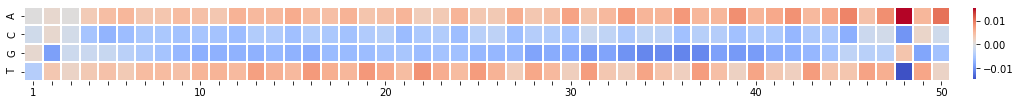

598


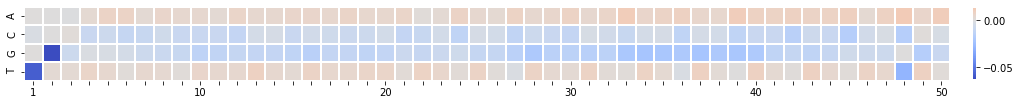

598


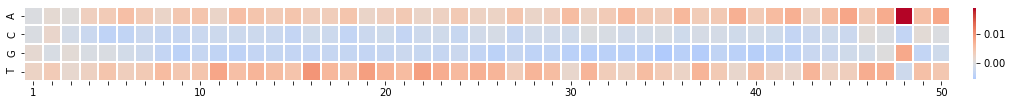

In [3]:
plot_meta(no_uaug_random, mrl_model)
plot_meta(no_uaug_random, mrl_model, subset='lowest_ten')
plot_meta(no_uaug_random, mrl_model, subset='highest_ten')

<font color=skyblue size=5> One non-overlapping uORF IF </font>

694


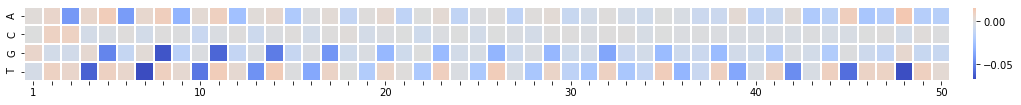

70


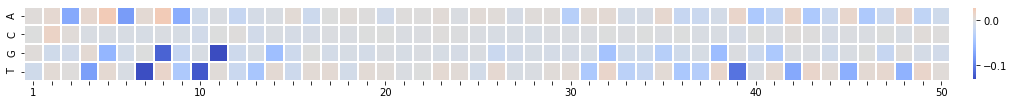

70


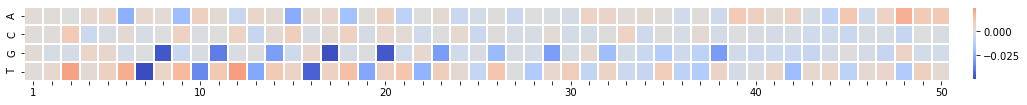

In [4]:
plot_meta(if_uorf_random, mrl_model)
plot_meta(if_uorf_random, mrl_model, subset='lowest_ten')
plot_meta(if_uorf_random, mrl_model, subset='highest_ten')

<font color=skyblue size=5> One non-overlapping uORF OOF </font>

1315


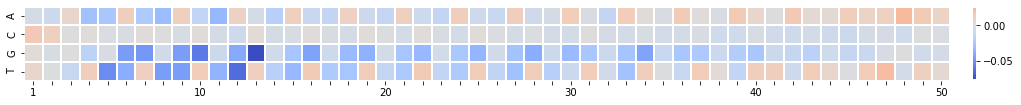

132


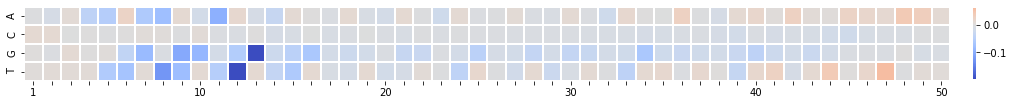

132


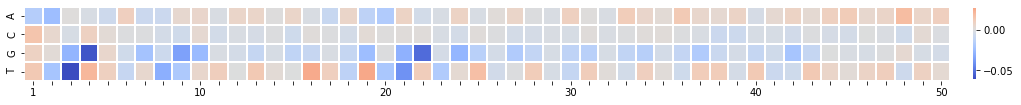

In [5]:
plot_meta(oof_uorf_random, mrl_model)
plot_meta(oof_uorf_random, mrl_model, subset='lowest_ten')
plot_meta(oof_uorf_random, mrl_model, subset='highest_ten')

<font color=skyblue size=5> IF uAUG </font>

1420


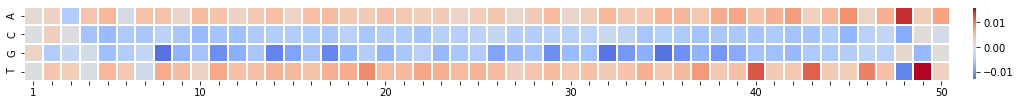

142


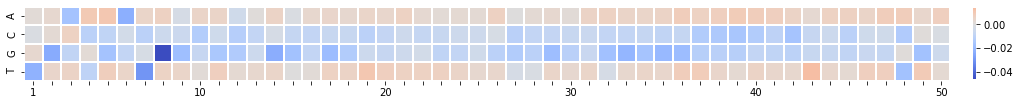

142


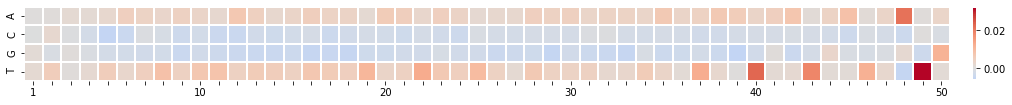

In [6]:
plot_meta(if_uaug_random, mrl_model)
plot_meta(if_uaug_random, mrl_model, subset='lowest_ten')
plot_meta(if_uaug_random, mrl_model, subset='highest_ten')

<font color=skyblue size=5> OOF uAUG </font>

5216


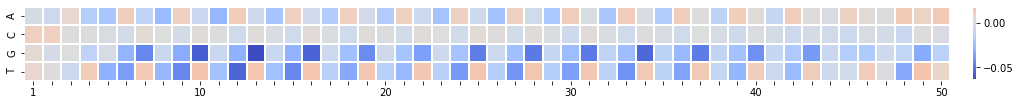

522


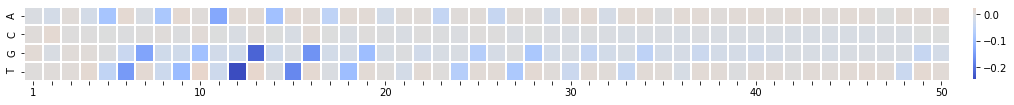

522


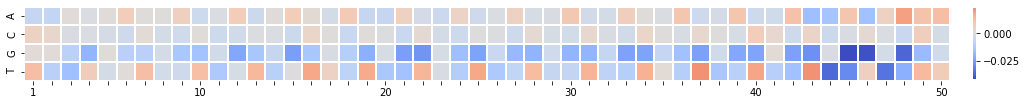

In [7]:
plot_meta(oof_uaug_random, mrl_model)
plot_meta(oof_uaug_random, mrl_model, subset='lowest_ten')
plot_meta(oof_uaug_random, mrl_model, subset='highest_ten')

<font color=skyblue size=5> Ambiguous </font>

6983


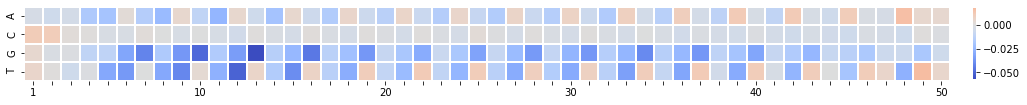

699


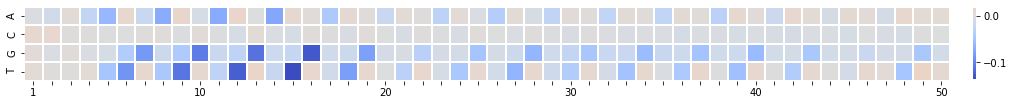

699


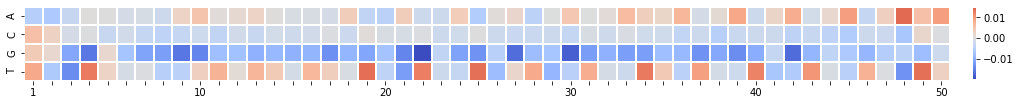

In [8]:
plot_meta(amb_random, mrl_model)
plot_meta(amb_random, mrl_model, subset='lowest_ten')
plot_meta(amb_random, mrl_model, subset='highest_ten')

<font color=skyblue size=30> Meta-Attribution of 5'UTR Signals (Human) </font>

<font color=skyblue size=5> No uAUG = control </font>

3495


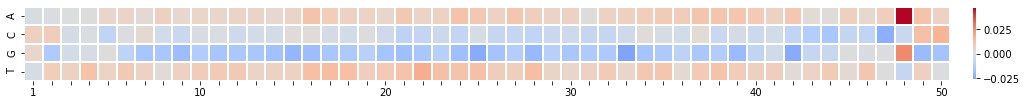

350


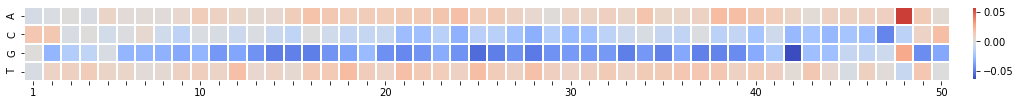

350


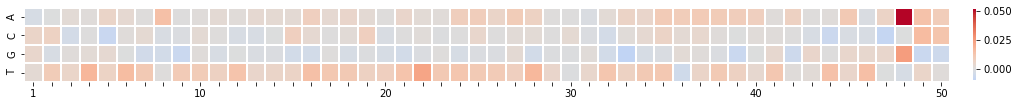

In [9]:
plot_meta(no_uaug_human, hmrl_model)
plot_meta(no_uaug_human, hmrl_model, subset='lowest_ten')
plot_meta(no_uaug_human, hmrl_model, subset='highest_ten')

<font color=skyblue size=5> One non-overlapping uORF IF </font>

67


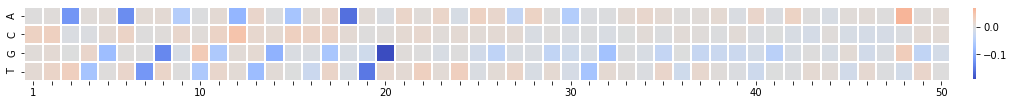

7


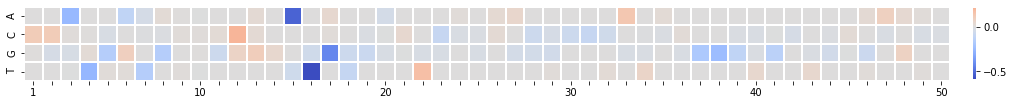

7


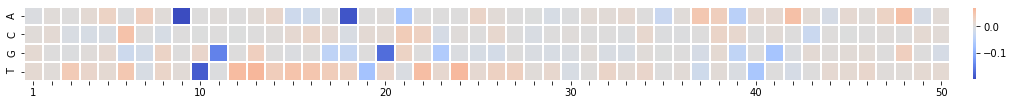

In [10]:
plot_meta(if_uorf_human, hmrl_model)
plot_meta(if_uorf_human, hmrl_model, subset='lowest_ten')
plot_meta(if_uorf_human, hmrl_model, subset='highest_ten')

<font color=skyblue size=5> One non-overlapping uORF OOF </font>

191


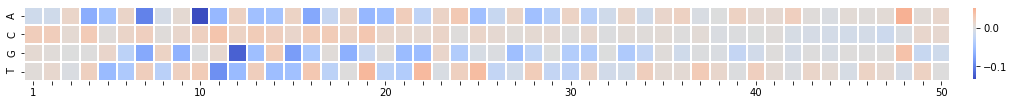

20


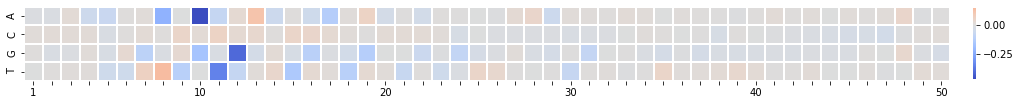

20


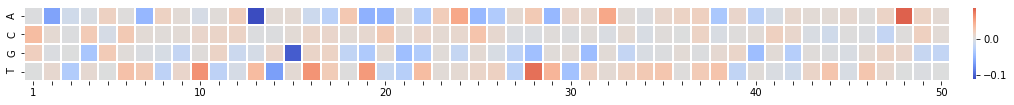

In [11]:
plot_meta(oof_uorf_human, hmrl_model)
plot_meta(oof_uorf_human, hmrl_model, subset='lowest_ten')
plot_meta(oof_uorf_human, hmrl_model, subset='highest_ten')

<font color=skyblue size=5> uAUG IF </font>

50


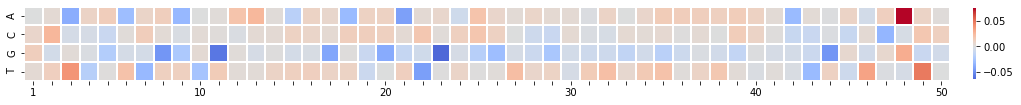

5


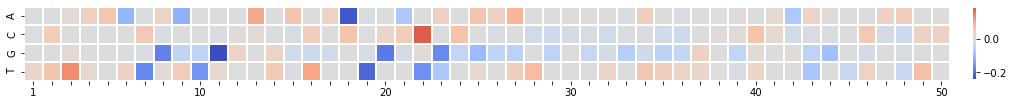

5


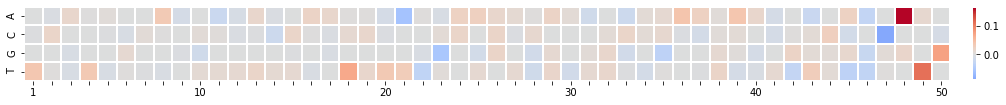

In [12]:
plot_meta(if_uaug_human, hmrl_model)
plot_meta(if_uaug_human, hmrl_model, subset='lowest_ten')
plot_meta(if_uaug_human, hmrl_model, subset='highest_ten')

<font color=skyblue size=5> uAUG OOF </font>

594


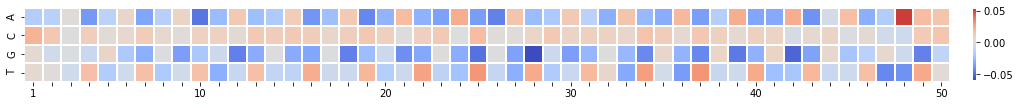

60


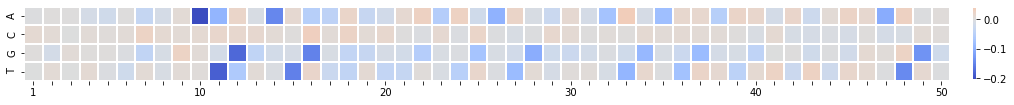

60


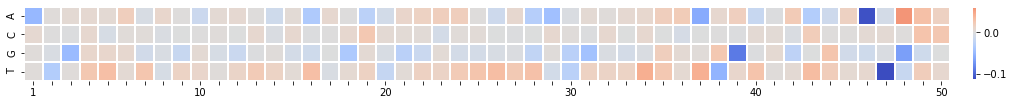

In [13]:
plot_meta(oof_uaug_human, hmrl_model)
plot_meta(oof_uaug_human, hmrl_model, subset='lowest_ten')
plot_meta(oof_uaug_human, hmrl_model, subset='highest_ten')

<font color=skyblue size=5> Ambiguous </font>

1615


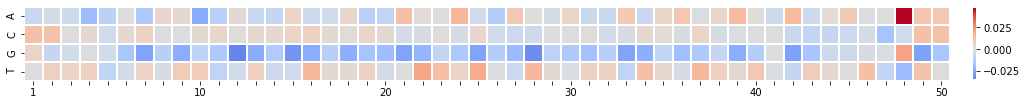

162


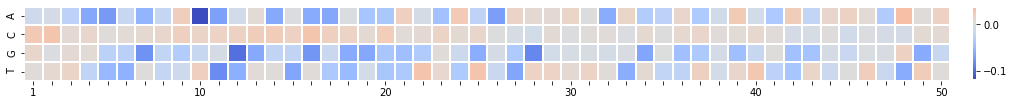

162


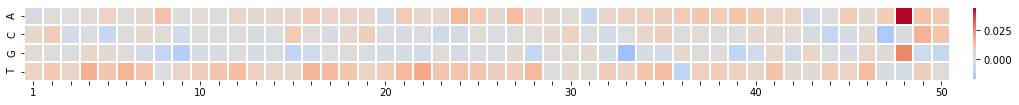

In [14]:
plot_meta(amb_human, hmrl_model)
plot_meta(amb_human, hmrl_model, subset='lowest_ten')
plot_meta(amb_human, hmrl_model, subset='highest_ten')